In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_excel('/content/BIG DATASET-NASA 200.xlsx')
dataset

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Average DO(ppm),Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
0,1,1.7,0.3,lb,1.8,50,15,120,29.10,16,56,5.78,27.09,3.22,0.10,100.88,71.93
1,2,2.4,0.1,lg,2.0,48,15,120,28.65,16,31,5.60,27.60,3.36,0.08,100.82,71.66
2,3,3.4,0.1,lb,0.5,55,12,132,28.10,16,29,5.33,27.49,3.29,0.18,100.88,73.13
3,4,4.2,0.0,lb,0.5,60,11,128,28.40,16,44,5.47,27.81,3.99,2.01,100.95,76.21
4,5,5.0,0.2,lb,0.5,45,10,126,28.15,16,57,5.43,27.84,3.28,3.42,100.90,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,115.0,-0.1,br,7.0,20,1,138,27.30,27,201,4.57,30.45,5.35,0.47,100.27,69.13
196,97,115.0,0.2,br,6.5,22,1,140,27.20,27,220,4.50,30.27,5.22,0.29,100.33,66.85
197,98,130.0,0.2,br,5.0,20,1,145,28.00,27,246,4.45,30.92,4.74,0.16,100.30,59.30
198,99,135.0,0.2,br,5.0,22,1,145,27.65,27,262,4.52,31.13,4.44,0.83,100.36,58.00


In [3]:
dataset['pH change']=abs(dataset['pH change'])

In [4]:
data=pd.DataFrame(dataset.dtypes)
data=data.rename(columns={0:'DataType'})
data

,DataType
DOC,int64
Daily feed amount(Kg),float64
pH change,float64
Water colour,object
Biofloc amount(ml/L),float64
SDR(cm),int64
Carbon essence(Kg),int64
Water level(cm),int64
Water temperature(°C),float64
Salinity(ppt),int64


In [5]:
data['MissingVal']=dataset.isnull().sum()
data['unique']=dataset.nunique()
data

,DataType,MissingVal,unique
DOC,int64,0,100
Daily feed amount(Kg),float64,0,77
pH change,float64,0,7
Water colour,object,0,9
Biofloc amount(ml/L),float64,0,37
SDR(cm),int64,0,27
Carbon essence(Kg),int64,0,63
Water level(cm),int64,0,36
Water temperature(°C),float64,0,64
Salinity(ppt),int64,0,13


In [6]:
dataset['Water colour'].value_counts()

br     81
dgr    39
gr     22
lgr    18
lg     18
lb     11
lbr     8
dbr     2
yg      1
Name: Water colour, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(dataset['Water colour'])
dataset['Water colour']=enc.transform(dataset['Water colour'])
dataset

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Average DO(ppm),Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
0,1,1.7,0.3,4,1.8,50,15,120,29.10,16,56,5.78,27.09,3.22,0.10,100.88,71.93
1,2,2.4,0.1,6,2.0,48,15,120,28.65,16,31,5.60,27.60,3.36,0.08,100.82,71.66
2,3,3.4,0.1,4,0.5,55,12,132,28.10,16,29,5.33,27.49,3.29,0.18,100.88,73.13
3,4,4.2,0.0,4,0.5,60,11,128,28.40,16,44,5.47,27.81,3.99,2.01,100.95,76.21
4,5,5.0,0.2,4,0.5,45,10,126,28.15,16,57,5.43,27.84,3.28,3.42,100.90,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,115.0,0.1,0,7.0,20,1,138,27.30,27,201,4.57,30.45,5.35,0.47,100.27,69.13
196,97,115.0,0.2,0,6.5,22,1,140,27.20,27,220,4.50,30.27,5.22,0.29,100.33,66.85
197,98,130.0,0.2,0,5.0,20,1,145,28.00,27,246,4.45,30.92,4.74,0.16,100.30,59.30
198,99,135.0,0.2,0,5.0,22,1,145,27.65,27,262,4.52,31.13,4.44,0.83,100.36,58.00


In [8]:
dataset.describe()

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Average DO(ppm),Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,50.500000,97.001500,0.200500,2.360000,5.626500,26.860000,28.180000,132.120000,29.198000,20.865000,188.755000,4.947900,29.887300,3.39050,1.585100,100.521600,69.804000
std,28.938507,55.326171,0.138004,2.467966,3.770441,8.524891,42.603673,8.853106,0.899565,3.190245,84.880614,0.461611,1.039488,0.84442,1.764326,0.231698,3.851098
min,1.000000,1.700000,0.000000,0.000000,0.000000,15.000000,1.000000,108.000000,27.200000,16.000000,29.000000,4.200000,27.090000,1.58000,0.000000,99.970000,58.000000
25%,25.750000,49.550000,0.100000,0.000000,2.000000,20.000000,5.000000,125.000000,28.637500,19.000000,120.000000,4.550000,29.400000,2.89750,0.275000,100.337500,67.470000
50%,50.500000,100.000000,0.200000,2.000000,6.000000,25.000000,12.500000,133.500000,29.350000,20.000000,194.000000,4.840000,30.035000,3.29000,0.820000,100.535000,69.760000
75%,75.250000,145.500000,0.300000,4.000000,9.000000,30.000000,26.250000,140.000000,29.900000,22.250000,252.500000,5.335000,30.670000,3.65250,2.247500,100.680000,71.945000
max,100.000000,245.000000,0.600000,8.000000,15.000000,60.000000,240.000000,154.000000,30.550000,28.000000,383.000000,5.950000,31.740000,6.38000,7.830000,100.970000,80.700000


In [9]:
df=dataset.drop('Average DO(ppm)',1)
df

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
0,1,1.7,0.3,4,1.8,50,15,120,29.10,16,56,27.09,3.22,0.10,100.88,71.93
1,2,2.4,0.1,6,2.0,48,15,120,28.65,16,31,27.60,3.36,0.08,100.82,71.66
2,3,3.4,0.1,4,0.5,55,12,132,28.10,16,29,27.49,3.29,0.18,100.88,73.13
3,4,4.2,0.0,4,0.5,60,11,128,28.40,16,44,27.81,3.99,2.01,100.95,76.21
4,5,5.0,0.2,4,0.5,45,10,126,28.15,16,57,27.84,3.28,3.42,100.90,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,115.0,0.1,0,7.0,20,1,138,27.30,27,201,30.45,5.35,0.47,100.27,69.13
196,97,115.0,0.2,0,6.5,22,1,140,27.20,27,220,30.27,5.22,0.29,100.33,66.85
197,98,130.0,0.2,0,5.0,20,1,145,28.00,27,246,30.92,4.74,0.16,100.30,59.30
198,99,135.0,0.2,0,5.0,22,1,145,27.65,27,262,31.13,4.44,0.83,100.36,58.00


# Correlation test

Feature 0: 144.677916
Feature 1: 163.430326
Feature 2: 21.929951
Feature 3: 46.482786
Feature 4: 91.471824
Feature 5: 53.218585
Feature 6: 1.279617
Feature 7: 38.300699
Feature 8: 8.873386
Feature 9: 65.443732
Feature 10: 128.813575
Feature 11: 66.985498
Feature 12: 5.057743
Feature 13: 40.797343
Feature 14: 62.597115
Feature 15: 1.501351


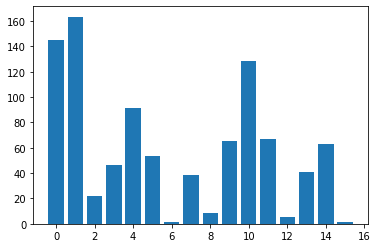

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs
 

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df, dataset['Average DO(ppm)'], test_size=0.33, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Mutual information feature selection

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
 
# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs
 
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df, dataset['Average DO(ppm)'], test_size=0.33, random_state=1)
# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.485876
Feature 1: 0.490989
Feature 2: 0.064153
Feature 3: 0.167957
Feature 4: 0.378742
Feature 5: 0.193011
Feature 6: 0.134867
Feature 7: 0.166155
Feature 8: 0.089698
Feature 9: 0.447263
Feature 10: 0.431969
Feature 11: 0.289148
Feature 12: 0.094060
Feature 13: 0.225031
Feature 14: 0.308098
Feature 15: 0.000000


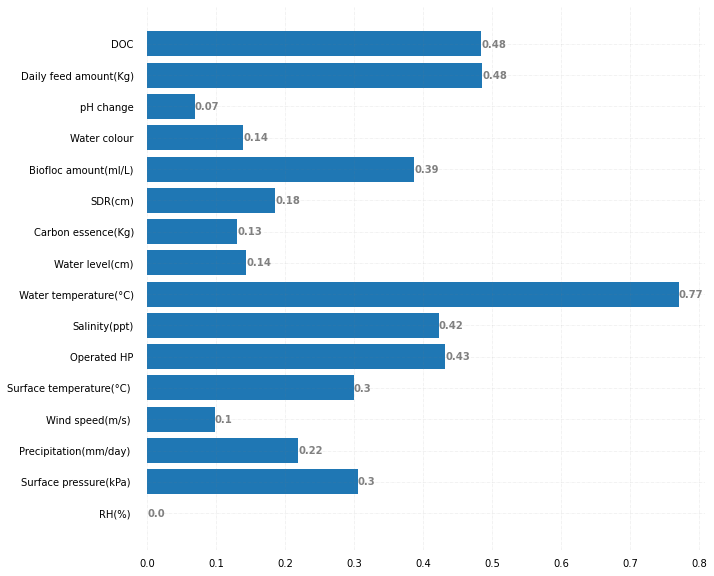

In [12]:
data = {'DOC':0.484,'Daily feed amount(Kg)':0.485, 'pH change':0.069,'Water colour':0.139, 'Biofloc amount(ml/L)':0.387, 'SDR(cm)':0.185, 'Carbon essence(Kg)':0.130, 'Water level(cm)':0.143, ' Water temperature(°C)':0.77, 'Salinity(ppt)':0.422, 'Operated HP':0.432, 'Surface temperature(°C) ':0.299, 'Wind speed(m/s) ':0.098, 'Precipitation(mm/day) ':0.219, 'Surface pressure(kPa) ':0.305, 'RH(%) ':0.000}
features=list(data.keys())
scores=list(data.values())
fig,ax=plt.subplots(figsize=(10,10))

ax.barh(features, scores)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
plt.show()

Spearman's correlation

In [13]:
df

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
0,1,1.7,0.3,4,1.8,50,15,120,29.10,16,56,27.09,3.22,0.10,100.88,71.93
1,2,2.4,0.1,6,2.0,48,15,120,28.65,16,31,27.60,3.36,0.08,100.82,71.66
2,3,3.4,0.1,4,0.5,55,12,132,28.10,16,29,27.49,3.29,0.18,100.88,73.13
3,4,4.2,0.0,4,0.5,60,11,128,28.40,16,44,27.81,3.99,2.01,100.95,76.21
4,5,5.0,0.2,4,0.5,45,10,126,28.15,16,57,27.84,3.28,3.42,100.90,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,115.0,0.1,0,7.0,20,1,138,27.30,27,201,30.45,5.35,0.47,100.27,69.13
196,97,115.0,0.2,0,6.5,22,1,140,27.20,27,220,30.27,5.22,0.29,100.33,66.85
197,98,130.0,0.2,0,5.0,20,1,145,28.00,27,246,30.92,4.74,0.16,100.30,59.30
198,99,135.0,0.2,0,5.0,22,1,145,27.65,27,262,31.13,4.44,0.83,100.36,58.00


In [14]:
y=pd.DataFrame(dataset['Average DO(ppm)'])
y

,Average DO(ppm)
0,5.78
1,5.60
2,5.33
3,5.47
4,5.43
...,...
195,4.57
196,4.50
197,4.45
198,4.52


In [15]:
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
d12 = dataset['Wind speed(m/s) ']
da = dataset['Average DO(ppm)']
d0 = dataset['DOC']
d1 = dataset['Daily feed amount(Kg)']
d2 = dataset['pH change']
d3 = dataset['Water colour']
d4 = dataset['SDR(cm)']
d5 = dataset['Carbon essence(Kg)']
d6 = dataset['Water level(cm)']
d7 = dataset['Water temperature(°C)']
d8 = dataset['Salinity(ppt)']
d9 = dataset['Operated HP']
d10 = dataset['Biofloc amount(ml/L)']
d11 = dataset['Surface temperature(°C) ']
d13 = dataset['Precipitation(mm/day) ']
d14 = dataset['Surface pressure(kPa) ']
d15 = dataset['RH(%) ']


# calculate spearman's correlation
corr0, _ = spearmanr(d0, da)
corr1, _ = spearmanr(d1, da)
corr2, _ = spearmanr(d2, da)
corr3, _ = spearmanr(d3, da)
corr4, _ = spearmanr(d4, da)
corr5, _ = spearmanr(d5, da)
corr6, _ = spearmanr(d6, da)
corr7, _ = spearmanr(d7, da)
corr8, _ = spearmanr(d8, da)
corr9, _ = spearmanr(d9, d2)
corr10, _ = spearmanr(d10, da)
corr11, _ = spearmanr(d11, da)
corr12, _ = spearmanr(d12, da)
corr13, _ = spearmanr(d13, da)
corr14, _ = spearmanr(d14, da)
corr15, _ = spearmanr(d15, d2)

print('Spearmans correlation of DOC      : %.3f' % corr0)
print('Spearmans correlation of DFA      : %.3f' % corr1)
print('Spearmans correlation of pH change: %.3f' % corr2)
print('Spearmans correlation of W. clr   : %.3f' % corr3)
print('Spearmans correlation of SDR      : %.3f' % corr4)
print('Spearmans correlation of C.E      : %.3f' % corr5)
print('Spearmans correlation of W. lvl   : %.3f' % corr6)
print('Spearmans correlation of W.Temp   : %.3f' % corr7)
print('Spearmans correlation of Salinity : %.3f' % corr8)
print('Spearmans correlation of operated HP: %.3f' % corr9)
print('Spearmans correlation Biofloc amnt: %.3f' % corr10)
print('Spearmans correlation S.temp      : %.3f' % corr11)
print('Spearmans correlation of Wind speed: %.3f' % corr12)
print('Spearmans correlation of Ppt       : %.3f' % corr13)
print('Spearmans correlation of S.Pressure: %.3f' % corr14)
print('Spearmans correlation of RH       : %.3f' % corr15)


Spearmans correlation of DOC      : -0.735
Spearmans correlation of DFA      : -0.744
Spearmans correlation of pH change: 0.337
Spearmans correlation of W. clr   : 0.491
Spearmans correlation of SDR      : 0.560
Spearmans correlation of C.E      : 0.266
Spearmans correlation of W. lvl   : -0.467
Spearmans correlation of W.Temp   : -0.227
Spearmans correlation of Salinity : -0.688
Spearmans correlation of operated HP: -0.288
Spearmans correlation Biofloc amnt: -0.596
Spearmans correlation S.temp      : -0.541
Spearmans correlation of Wind speed: -0.289
Spearmans correlation of Ppt       : -0.569
Spearmans correlation of S.Pressure: 0.601
Spearmans correlation of RH       : -0.126


# To find correlation among the parameters

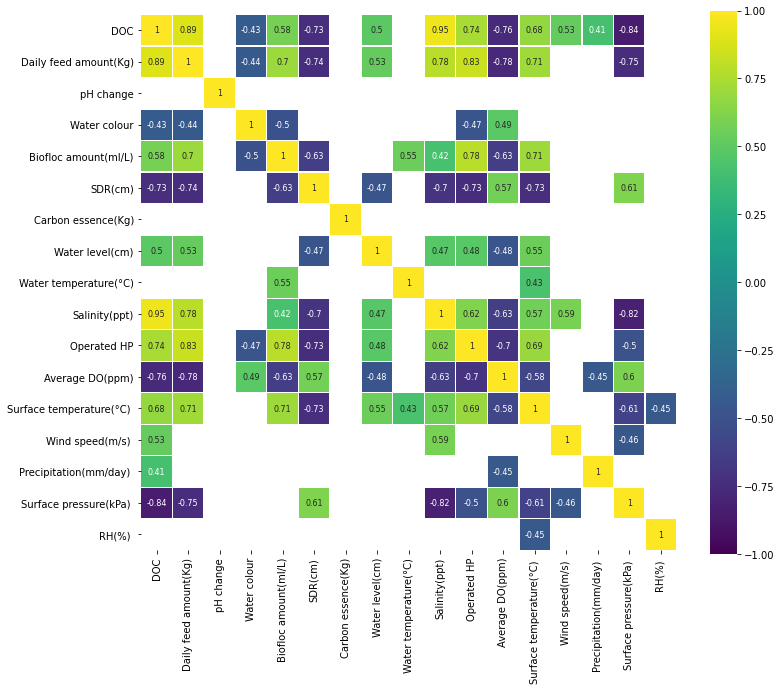

In [16]:
corr = dataset.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

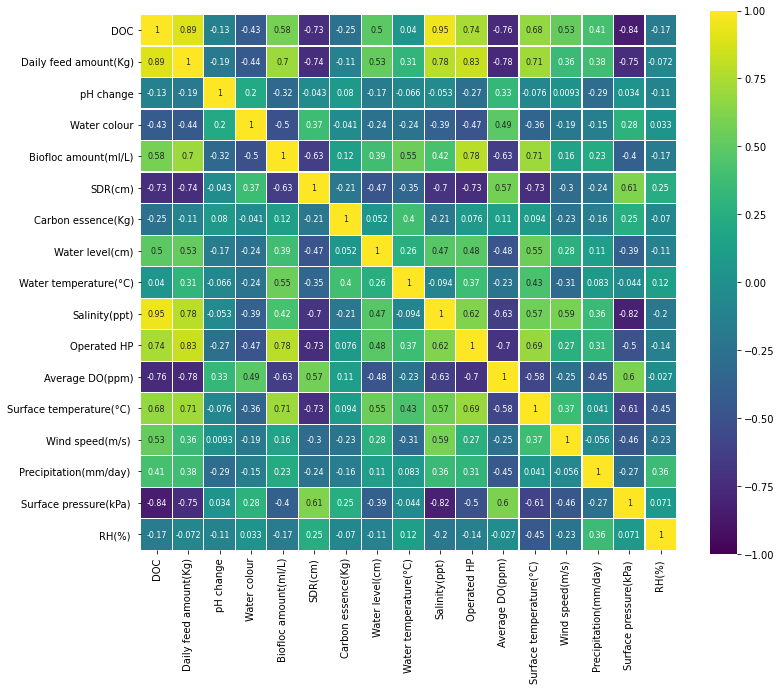

In [17]:
corr = dataset.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0) | (corr <= -0)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# case study 1:
Features selection based on correlation:

Features having corr>50 are selected
 
 - DFA,
 
 -DOC,
 
 -Operated HP,
 
 -Biofloc amnt,
 
 -S.Temp,
 
 -Salinity,
 
 -S.Press

 - SDR

# case study 2:
 Features selection based on Mutual Information(M.I)

Features having M.I >0.4 are selected
   
  - DFA
  -DOC
  - Salinity
  - Operated HP

# case study 3:
 Features selection based on Spearman correlation

Features having Sp.corr >0.5 are selected
   
  - DFA
  - DOC
  - Salinity
  - S.Press
  - Biofloc amnt
  - precipitation
  - SDR
  - S.Temp

Pair plot

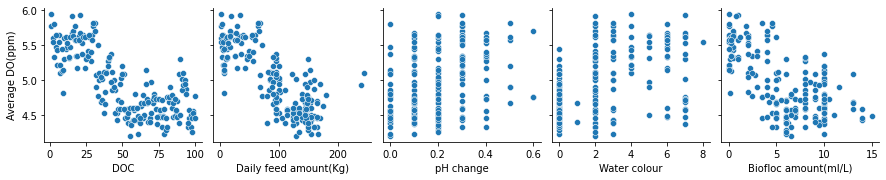

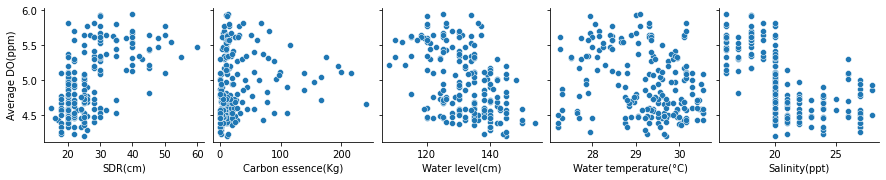

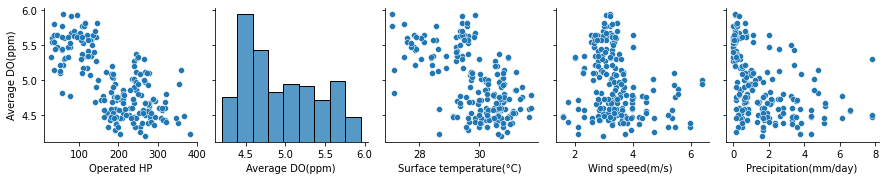

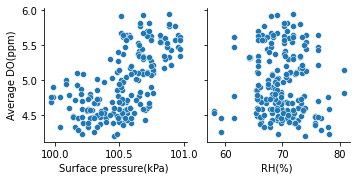

In [18]:
for i in range(0, len(dataset.columns), 5):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+5],
                y_vars=['Average DO(ppm)'])

# Finding R square 

In [19]:
df1=dataset[['DOC','Daily feed amount(Kg)','SDR(cm)','Operated HP','Surface temperature(°C) ','Surface pressure(kPa) ','Salinity(ppt)','Biofloc amount(ml/L)']]

In [20]:
import statsmodels.api as sm
X_addC = sm.add_constant(df1)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.6859498639875761 0.6727959315891499


In [21]:
df2=dataset[['DOC','Daily feed amount(Kg)','SDR(cm)','Operated HP','Surface temperature(°C) ','Surface pressure(kPa) ','Salinity(ppt)','Biofloc amount(ml/L)','Wind speed(m/s) ','Precipitation(mm/day) ','RH(%) ']]

In [22]:
import statsmodels.api as sm
X_addC = sm.add_constant(df2)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.7092524841779039 0.6922406614436323


In [23]:
df3=dataset[['DOC','Salinity(ppt)','Daily feed amount(Kg)','Operated HP']]

In [24]:
import statsmodels.api as sm
X_addC = sm.add_constant(df3)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.6816174497339251 0.6750865256259031


In [25]:
df4=dataset[['DOC','Daily feed amount(Kg)','Salinity(ppt)','Operated HP','Surface temperature(°C) ','Wind speed(m/s) ','Precipitation(mm/day) ','Surface pressure(kPa) ','RH(%) ']]

In [26]:
import statsmodels.api as sm
X_addC = sm.add_constant(df4)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.7066899599785568 0.6927963265038568


In [27]:
df5=dataset[['DOC','Daily feed amount(Kg)','SDR(cm)','Biofloc amount(ml/L)','Surface temperature(°C) ','Salinity(ppt)','Precipitation(mm/day) ','Surface pressure(kPa) ']]

In [28]:
import statsmodels.api as sm
X_addC = sm.add_constant(df5)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.6974631562351171 0.6847914559727136


In [29]:
df6=dataset[['DOC','Daily feed amount(Kg)','SDR(cm)','Biofloc amount(ml/L)','Surface temperature(°C) ','Salinity(ppt)','Precipitation(mm/day) ','Surface pressure(kPa) ','Wind speed(m/s) ','RH(%) ']]

In [30]:
import statsmodels.api as sm
X_addC = sm.add_constant(df6)
result = sm.OLS(dataset['Average DO(ppm)'], X_addC).fit()
print(result.rsquared, result.rsquared_adj)

0.7078449027625282 0.692386961109752


In [31]:
dataset.save

,DOC,Daily feed amount(Kg),pH change,Water colour,Biofloc amount(ml/L),SDR(cm),Carbon essence(Kg),Water level(cm),Water temperature(°C),Salinity(ppt),Operated HP,Average DO(ppm),Surface temperature(°C),Wind speed(m/s),Precipitation(mm/day),Surface pressure(kPa),RH(%)
0,1,1.7,0.3,4,1.8,50,15,120,29.10,16,56,5.78,27.09,3.22,0.10,100.88,71.93
1,2,2.4,0.1,6,2.0,48,15,120,28.65,16,31,5.60,27.60,3.36,0.08,100.82,71.66
2,3,3.4,0.1,4,0.5,55,12,132,28.10,16,29,5.33,27.49,3.29,0.18,100.88,73.13
3,4,4.2,0.0,4,0.5,60,11,128,28.40,16,44,5.47,27.81,3.99,2.01,100.95,76.21
4,5,5.0,0.2,4,0.5,45,10,126,28.15,16,57,5.43,27.84,3.28,3.42,100.90,76.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,115.0,0.1,0,7.0,20,1,138,27.30,27,201,4.57,30.45,5.35,0.47,100.27,69.13
196,97,115.0,0.2,0,6.5,22,1,140,27.20,27,220,4.50,30.27,5.22,0.29,100.33,66.85
197,98,130.0,0.2,0,5.0,20,1,145,28.00,27,246,4.45,30.92,4.74,0.16,100.30,59.30
198,99,135.0,0.2,0,5.0,22,1,145,27.65,27,262,4.52,31.13,4.44,0.83,100.36,58.00
